In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel


X_train = np.load('initial_data/function_3/initial_inputs.npy')
Y_train = np.load('initial_data/function_3/initial_outputs.npy')

X_train = np.append(X_train, [[0.999999, 0.5,0.797978],[0.959595,0.05,0.424242],[2.42424e-01,5.00000e-02,9.00000e-06],
                              [0.009595,0.969696,0.858585],
                              [0.970202,0.040404,0.515151],
                              [9.50000e-01,1.00000e-06,6.26262e-01]], axis=0)
Y_train = np.append(Y_train, [-0.0671101326201069,-0.092610115292593,-0.1872165089655,-0.0575040158619428,-0.0865435771267751,-0.154219595742106])

print(X_train)
print(Y_train)

[[1.71525207e-01 3.43916870e-01 2.48737201e-01]
 [2.42114461e-01 6.44074270e-01 2.72432809e-01]
 [5.34905720e-01 3.98500915e-01 1.73388729e-01]
 [4.92581415e-01 6.11593188e-01 3.40176386e-01]
 [1.34621666e-01 2.19917240e-01 4.58206220e-01]
 [3.45523271e-01 9.41359831e-01 2.69363479e-01]
 [1.51836632e-01 4.39990619e-01 9.90881867e-01]
 [6.45502835e-01 3.97142940e-01 9.19771338e-01]
 [7.46911945e-01 2.84196309e-01 2.26299855e-01]
 [1.70476994e-01 6.97032401e-01 1.49169434e-01]
 [2.20549337e-01 2.97825244e-01 3.43555344e-01]
 [6.66013659e-01 6.71985151e-01 2.46295297e-01]
 [4.68089497e-02 2.31360241e-01 7.70617592e-01]
 [6.00097282e-01 7.25135725e-01 6.60886415e-02]
 [9.65994849e-01 8.61119690e-01 5.66829131e-01]
 [9.99999000e-01 5.00000000e-01 7.97978000e-01]
 [9.59595000e-01 5.00000000e-02 4.24242000e-01]
 [2.42424000e-01 5.00000000e-02 9.00000000e-06]
 [9.59500000e-03 9.69696000e-01 8.58585000e-01]
 [9.70202000e-01 4.04040000e-02 5.15151000e-01]
 [9.50000000e-01 1.00000000e-06 6.262620

In [2]:
# Define the Gaussian Process
kernel = RBF(length_scale=[1.0, 1.0, 1.0]) + WhiteKernel(noise_level=0.1)
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.01, normalize_y=True)
gp.fit(X_train, Y_train)

GaussianProcessRegressor(alpha=0.01,
                         kernel=RBF(length_scale=[1, 1, 1]) + WhiteKernel(noise_level=0.1),
                         normalize_y=True)

In [3]:
def ucb(X, gp, kappa=1.96):  # kappa can be adjusted based on your confidence level needs
    mean, std = gp.predict(X, return_std=True)
    return mean + kappa * std

# Define the range to test for each compound
test_range = np.linspace(0, 1, 100)
xx, yy, zz = np.meshgrid(test_range, test_range, test_range)
all_combinations = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T

# Calculate UCB for all combinations
UCB_values = ucb(all_combinations, gp)

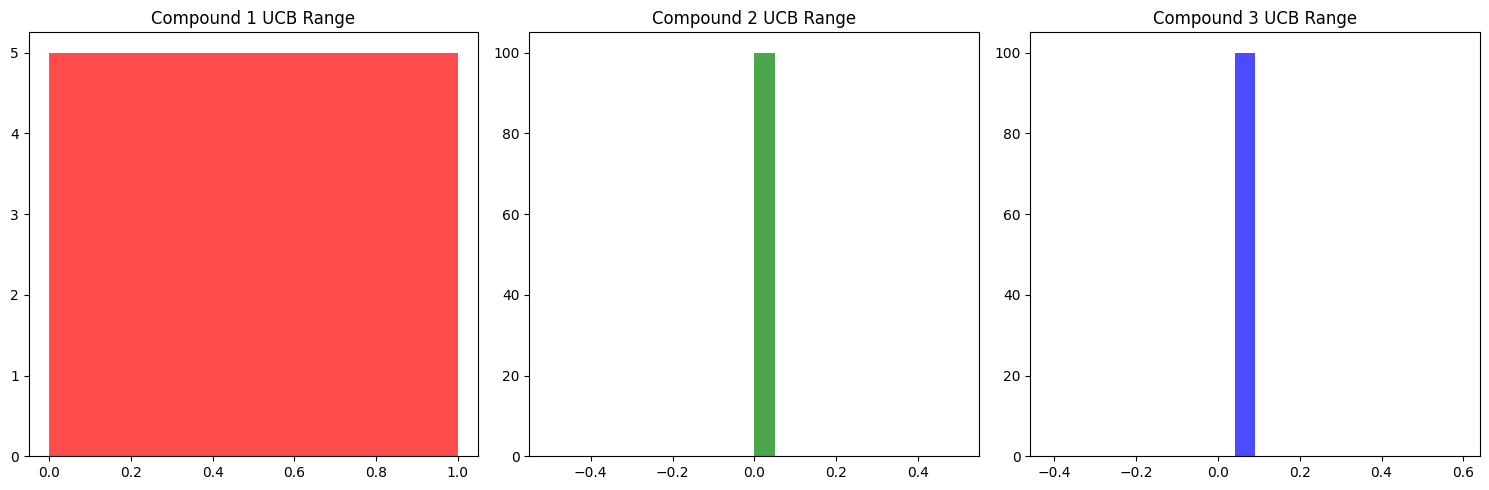

Estimated effective UCB ranges for each compound (5th to 95th percentile): [array([0.05, 0.95]), array([0., 0.]), array([0.09090909, 0.09090909])]


In [4]:
# Find indices where UCB is maximized
max_ucb_idx = np.argsort(-UCB_values)[:100]  # Top 100 indices with maximum UCB
optimal_ranges_ucb = all_combinations[max_ucb_idx]

import matplotlib.pyplot as plt

# Plot histograms to determine the common UCB ranges for each compound
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['red', 'green', 'blue']
for i in range(3):
    axes[i].hist(optimal_ranges_ucb[:, i], bins=20, color=colors[i], alpha=0.7)
    axes[i].set_title(f'Compound {i+1} UCB Range')

plt.tight_layout()
plt.show()

# Calculate range estimates for submission based on UCB
compound_ucb_range_estimates = [np.percentile(optimal_ranges_ucb[:, i], [5, 95]) for i in range(3)]
print("Estimated effective UCB ranges for each compound (5th to 95th percentile):", compound_ucb_range_estimates)


Optimal range for further exploration based on UCB (original scale): [9.99999000e-01 1.00000000e-06 9.46149521e-02]


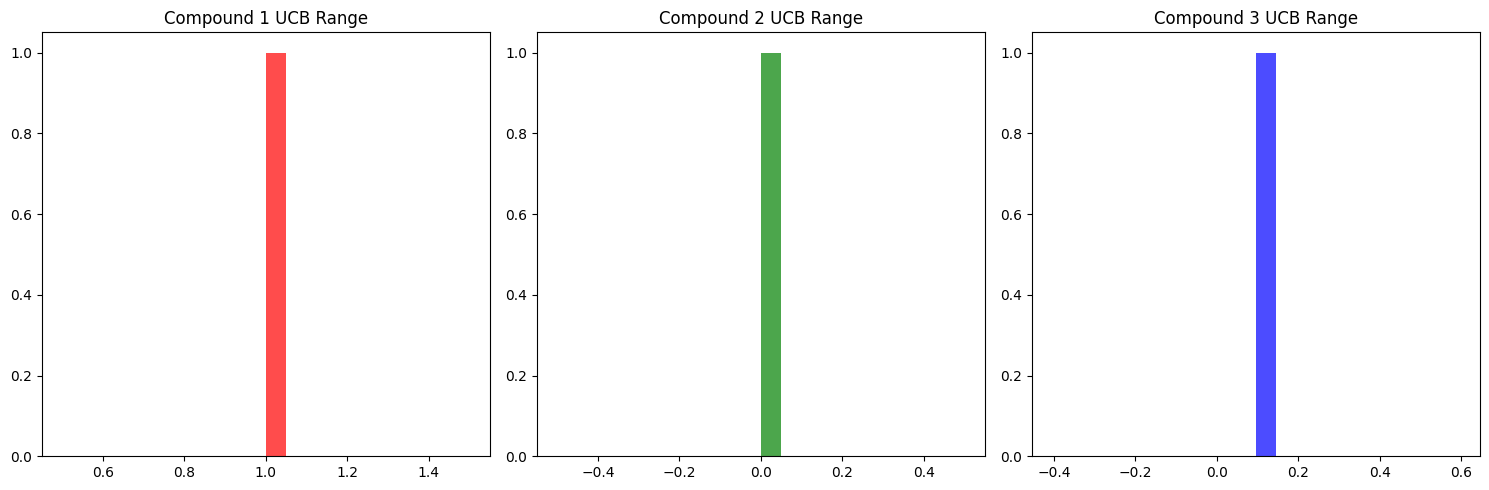

Estimated effective UCB ranges for each compound (5th to 95th percentile): [array([0.999999, 0.999999]), array([1.e-06, 1.e-06]), array([0.09461495, 0.09461495])]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.preprocessing import MinMaxScaler

# Load the initial data
X_train = np.load('initial_data/function_3/initial_inputs.npy')
Y_train = np.load('initial_data/function_3/initial_outputs.npy')

# Append additional data points
X_train = np.append(X_train, [[0.999999, 0.5, 0.797978], [0.959595, 0.05, 0.424242], [0.242424, 0.05, 0.000009],
                              [0.009595, 0.969696, 0.858585], [0.970202, 0.040404, 0.515151], [0.95, 0.000001, 0.626262]], axis=0)
Y_train = np.append(Y_train, [-0.0671101326201069, -0.092610115292593, -0.1872165089655, -0.0575040158619428, -0.0865435771267751, -0.154219595742106])

# Normalize the input data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)

# Define the Gaussian Process model
kernel = RBF(length_scale=[1.0, 1.0, 1.0]) + WhiteKernel(noise_level=0.1)
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.01, normalize_y=True)
gp.fit(X_train_normalized, Y_train)

def ucb(X, gp, kappa=1.96):
    mean, std = gp.predict(X, return_std=True)
    return mean + kappa * std

# Define the range to test for each compound with increased resolution
test_range = np.linspace(0, 1, 200)
xx, yy, zz = np.meshgrid(test_range, test_range, test_range)
all_combinations = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T

# Calculate UCB for all combinations
UCB_values = ucb(all_combinations, gp)

# Find the index where UCB is maximized
max_ucb_idx = np.argmax(UCB_values)  # Index with maximum UCB
optimal_range_ucb = all_combinations[max_ucb_idx]

# Transform the optimal range back to the original scale
optimal_range_ucb_original = scaler.inverse_transform([optimal_range_ucb])
print("Optimal range for further exploration based on UCB (original scale):", optimal_range_ucb_original[0])

# Plot histograms to determine the common UCB ranges for each compound
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['red', 'green', 'blue']
for i in range(3):
    axes[i].hist(all_combinations[max_ucb_idx][i], bins=20, color=colors[i], alpha=0.7)
    axes[i].set_title(f'Compound {i+1} UCB Range')

plt.tight_layout()
plt.show()

# Calculate range estimates for submission based on UCB
compound_ucb_range_estimates = [np.percentile(optimal_range_ucb_original[:, i], [5, 95]) for i in range(3)]
print("Estimated effective UCB ranges for each compound (5th to 95th percentile):", compound_ucb_range_estimates)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.preprocessing import MinMaxScaler

# Load the initial data
X_train = np.load('initial_data/function_3/initial_inputs.npy')
Y_train = np.load('initial_data/function_3/initial_outputs.npy')

# Append additional data points
X_train = np.append(X_train, [[0.999999, 0.5, 0.797978], [0.959595, 0.05, 0.424242], [0.242424, 0.05, 0.000009],
                              [0.009595, 0.969696, 0.858585], [0.970202, 0.040404, 0.515151], [0.95, 0.000001, 0.626262]], axis=0)
Y_train = np.append(Y_train, [-0.0671101326201069, -0.092610115292593, -0.1872165089655, -0.0575040158619428, -0.0865435771267751, -0.154219595742106])

# Normalize the input data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)

# Define the Gaussian Process model
kernel = RBF(length_scale=[1.0, 1.0, 1.0]) + WhiteKernel(noise_level=0.1)
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.01, normalize_y=True)
gp.fit(X_train_normalized, Y_train)

def ucb(X, gp, kappa=0.1):  # Lower kappa for more exploitation
    mean, std = gp.predict(X, return_std=True)
    return mean + kappa * std

# Define the range to test for each compound with increased resolution
test_range = np.linspace(0, 1, 200)
xx, yy, zz = np.meshgrid(test_range, test_range, test_range)
all_combinations = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T

# Calculate UCB for all combinations
UCB_values = ucb(all_combinations, gp)

# Find the index where UCB is maximized
max_ucb_idx = np.argmax(UCB_values)  # Index with maximum UCB
optimal_range_ucb = all_combinations[max_ucb_idx]

# Transform the optimal range back to the original scale
optimal_range_ucb_original = scaler.inverse_transform([optimal_range_ucb])
print("Optimal range for further exploration based on UCB (original scale):", optimal_range_ucb_original[0])

# Calculate range estimates for submission based on UCB
compound_ucb_range_estimates = [np.percentile(optimal_range_ucb_original[:, i], [5, 95]) for i in range(3)]
print("Estimated effective UCB ranges for each compound (5th to 95th percentile):", compound_ucb_range_estimates)


Optimal range for further exploration based on UCB (original scale): [0.77106139 0.90147625 0.07967717]
Estimated effective UCB ranges for each compound (5th to 95th percentile): [array([0.77106139, 0.77106139]), array([0.90147625, 0.90147625]), array([0.07967717, 0.07967717])]


In [10]:
from scipy.stats import norm

def expected_improvement(X, gp, xi=0.01):
    mean, std = gp.predict(X, return_std=True)
    best_Y = np.max(Y_train)
    Z = (mean - best_Y - xi) / std
    ei = (mean - best_Y - xi) * norm.cdf(Z) + std * norm.pdf(Z)
    ei[std == 0.0] = 0.0
    return ei

# Calculate EI for all combinations
EI_values = expected_improvement(all_combinations, gp)

# Find the index where EI is maximized
max_ei_idx = np.argmax(EI_values)  # Index with maximum EI
optimal_range_ei = all_combinations[max_ei_idx]

# Transform the optimal range back to the original scale
optimal_range_ei_original = scaler.inverse_transform([optimal_range_ei])
print("Optimal range for further exploration based on EI (original scale):", optimal_range_ei_original[0])

# Calculate range estimates for submission based on EI
compound_ei_range_estimates = [np.percentile(optimal_range_ei_original[:, i], [5, 95]) for i in range(3)]
print("Estimated effective EI ranges for each compound (5th to 95th percentile):", compound_ei_range_estimates)


Optimal range for further exploration based on EI (original scale): [9.99999000e-01 1.00000000e-06 8.96356914e-02]
Estimated effective EI ranges for each compound (5th to 95th percentile): [array([0.999999, 0.999999]), array([1.e-06, 1.e-06]), array([0.08963569, 0.08963569])]
